In [1]:
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Num GPUs Available:  1


In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
from tensorflow import keras
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import *
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, GlobalMaxPooling2D 
from sklearn.model_selection import train_test_split

In [4]:
pwd

'D:\\projects\\Personal\\Fraudulent-Signature-Detection\\model\\EfficientNet'

In [15]:
from numpy import save, load
X_train=load('../../data/X_train.npy')
y_train=load('../../data/y_train.npy')
X_test=load('../../data/X_test.npy')
y_test=load('../../data/y_test.npy')

In [18]:
X_train.shape,y_train.shape

((14644, 256, 512, 3), (14644, 1))

In [19]:
X_test.shape,y_test.shape

((3661, 256, 512, 3), (3661, 1))

In [24]:
input_shape=(256,512,3)

In [26]:
model=load_model("../saved_models/eff_net_base.h5")
model.summary()

In [38]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)


In [39]:
epochs1 = 15

In [40]:
history_fine_tune_base=model.fit(X_train[5000:10000],y_train[5000:10000], batch_size=4, epochs=epochs1, validation_data=(X_test[1000:2300],y_test[1000:2300]))

Epoch 1/15
1250/1250 [==============================] - 162s 106ms/step - loss: 0.7433 - binary_accuracy: 0.4824 - val_loss: 0.6917 - val_binary_accuracy: 0.4754
Epoch 2/15
1250/1250 [==============================] - 143s 115ms/step - loss: 0.7048 - binary_accuracy: 0.4952 - val_loss: 0.7659 - val_binary_accuracy: 0.5323
Epoch 3/15
1250/1250 [==============================] - 146s 117ms/step - loss: 0.7099 - binary_accuracy: 0.4786 - val_loss: 0.6956 - val_binary_accuracy: 0.4754
Epoch 4/15
1250/1250 [==============================] - 140s 112ms/step - loss: 0.7065 - binary_accuracy: 0.4818 - val_loss: 0.6917 - val_binary_accuracy: 0.4754
Epoch 5/15
1250/1250 [==============================] - 140s 112ms/step - loss: 0.7031 - binary_accuracy: 0.4762 - val_loss: 0.7044 - val_binary_accuracy: 0.4754
Epoch 6/15
1250/1250 [==============================] - 140s 112ms/step - loss: 0.7027 - binary_accuracy: 0.4826 - val_loss: 0.6920 - val_binary_accuracy: 0.4754
Epoch 7/15
1250/1250 [======

In [41]:
model.save("../saved_models/eff_net_base_1.h5")

D:\projects\Jupyter\gpu-env\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [42]:
def plot_accuracy(history):
    plt.plot(history.history['val_binary_accuracy'])
    plt.plot(history.history['binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['val_accuracy', 'Train_accuracy'], loc = 'best')
    plt.show()

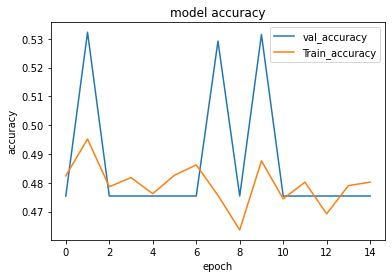

In [43]:
plot_accuracy(history_fine_tune_base)

In [44]:
def plot_loss(history):
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['val_loss', 'train_loss'], loc = 'best')
    plt.show()

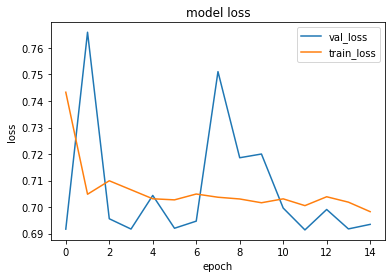

In [45]:
plot_loss(history_fine_tune_base)